# 2.1 Polinomio de interpolación de lagrange

[![Open In Colab](./imagenes/colab-badge.png)](https://colab.research.google.com/github/caramirezs/MetNum_librodigital/blob/master/1_Ecuaciones_de_una_variable/2.1_Polinomio_de_interpolacion_de_Lagrange.ipynb)

In [16]:
# EJECUTAR ESTA CELDA
# Librerias y Funciones iniciales

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn

def LagrangePol(xi, yi):
    # PROCEDIMIENTO
    # Polinomio de Lagrange
    n = len(xi)
    x = sym.Symbol('x')
    polinomio = 0
    divisorL = np.zeros(n, dtype = float)

    for i in range(0,n,1):
        # Termino de Lagrange
        numerador = 1
        denominador = 1
        for j  in range(0,n,1):
            if (j!=i):
                numerador = numerador*(x-xi[j])
                denominador = denominador*(xi[i]-xi[j])
        terminoLi = numerador/denominador
        polinomio = polinomio + terminoLi*yi[i]
        divisorL[i] = denominador

    # simplifica el polinomio
    polisimple = polinomio.expand()

    print('Expresión expandida de los polinomios base de lagrange:')
    print(polinomio)
    print('Polinomio de interpolación de Lagrange:')
    print(polisimple)

    # Gráfica
    x0 = np.linspace(min(xi),max(xi),1000)
    px = sym.lambdify(x,polisimple)

    sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn
    fig, ax = plt.subplots(figsize=(15,6))
    plt.plot(xi, yi,'o', label = 'datos')
    plt.plot(x0, px(x0), label = 'polinomio')
    ax.tick_params(labelsize=14, axis='x')
    ax.tick_params(labelsize=14, axis='y')
    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    plt.title(f'Polinomio de interpolación de Lagrange', fontsize=18)
    plt.legend(fontsize=14)
    plt.show()

## Introducción

El polinomio de interpolación de Lagrange es un método comúnmente utilizado para aproximar una función a través de un polinomio que pasa exactamente por un conjunto finito de puntos conocidos. El método se basa en la idea de que, dado un conjunto de puntos, existe un único polinomio de grado $n-1$ o menor que pasa exactamente por esos $n$ puntos. El polinomio resultante se construye a partir de un conjunto de polinomios base de Lagrange, que son polinomios de grado $n-1$ o menor que toman el valor 1 en uno de los puntos y 0 en todos los demás puntos.

El polinomio de interpolación de Lagrange se utiliza comúnmente en la aproximación de funciones y en la resolución de problemas de ingeniería, en los cuales es necesario conocer el valor de la función en puntos intermedios. Aunque este método es útil en muchos casos, su principal limitación es que el polinomio resultante puede presentar oscilaciones no deseadas, especialmente en regiones donde hay una alta densidad de puntos de interpolación.

## Definición Polinomio de interpolación de Lagrange

El polinomio de interpolación de Lagrange es un método para aproximar una función a través de un polinomio que pasa exactamente por un conjunto finito de puntos conocidos. Este polinomio se puede construir de manera directa utilizando los **polinomios base de Lagrange**.

Supongamos que tenemos $n+1$ puntos $(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)$ y queremos encontrar un polinomio p(x) de grado $n-1$ o menor que pase exactamente por esos $n+1$ puntos. El polinomio resultante se puede escribir como:

$$ p(x) = \sum_{i=0}^{n} y_i \cdot l_i(x) $$

donde $l_i(x)$ son los **polinomios base de Lagrange**, definidos como:

$$ l_i(x) = \prod_{\substack{j=0 \ j \neq i}}^n \frac{x-x_j}{x_i-x_j} $$

Los polinomios base de Lagrange tienen la propiedad de tomar el valor 1 en el punto $x_i$ y el valor 0 en todos los demás puntos. Por lo tanto, el polinomio resultante p(x) pasa exactamente por los n+1 puntos.

### Explicación

Para construir el polinomio base de Lagrange $l_0$, se busca determinar un polinomio que pase por $(x_0, y_0)$ y que se anule en $x_1, x_2, ..., x_n$. Es decir, se busca que el polinomio tenga la forma:

$$
l_o(x_j)=\begin{cases} 1 ,\ \ &\text{si $j = 0$}\\0 ,\ \ &\text{si  $j \neq  0, $}&\text{para $j = 0,1,2, ...,n$}\end{cases}
$$

La manera de obtener este polinomio es pensar en $x_1, x_2, ..., x_n$ como las raíces del polinomio, es decir:

$$l_0(x) = (x − x_1)(x − x_2)(x − x_3) · · · (x − x_n)$$

donde $l_0(x_n) = 0, \ \ n \neq 0$. Sin embargo, se requiere que $l_0(x_0) = 1$, pero $l_0(x_0) = (x_0 − x_1)(x_0 − x_2)(x_0 − x_3) · · · (x_0 − x_n) \neq 1$. Para resolver este problema, se reformula $l_0(x_i)$ para que se cancele en todo $x_i$:

$$
l_0(x) =
\frac
{(x_0 − x_1)(x_0 − x_2)(x_0 − x_3) · · · (x_0 − x_n)}
{(x_0 − x_1)(x_0 − x_2)(x_0 − x_3) · · · (x_0 − x_n)}
= 1,
$$

donde $l_0(x_n) = 0, \ \ n \neq 0$ y $l_0(x_0) = 1$. De esta manera, se obtiene el primer polinomio base de Lagrange

$$ l_0(x) = \prod_{\substack{j=0 \ j \neq 0}}^n \frac{x-x_j}{x_0-x_j} $$

Aplicando la misma idea para cada $x_j$ de nuestro conjunto de $n+1$ puntos, se llega a la definición de $l_i(x)$

$$ l_i(x) = \prod_{\substack{j=0 \ j \neq i}}^n \frac{x-x_j}{x_i-x_j} \ \ \text{para $i= 0, 1, 2, ..., n$}$$

Al aplicar los polinomios base de Lagrange para construir el polinomio interpolante, se tiene que cada $l_i$ es igual a $1$ en $x_i$ y $0$ en todos los demás puntos de interpolación $x_j$. Por lo tanto, cuando se multiplica cada $l_i$ por el correspondiente $y_i$, se tiene que el producto es igual a $y_i$ en $x_i$ y $0$ en todos los demás puntos de interpolación $x_j$.

De esta forma, el polinomio interpolante $p(x)$ pasa por todos los puntos de interpolación $(x_i, y_i)$, es decir, $p(x_i) = y_i$ para $i = 0, 1, 2, ..., n$. La fórmula del polinomio de interpolación de Lagrange se obtiene al sumar todos los términos de la forma $y_i \cdot l_i(x)$, es decir:

$$ p(x) = \sum_{i=0}^{n} y_i \cdot l_i(x) $$

Donde $l_i(x)$ es el polinomio base de Lagrange correspondiente a $x_i$. Esta fórmula define un polinomio de grado $n-1$ o menor que pasa exactamente por los puntos de interpolación $(x_i, y_i)$, lo que lo hace útil para aproximar valores intermedios de una función conocida en los puntos de interpolación dados.

## Ejemplo práctico 1

**Interpolar un conjunto de datos mediante el polinomio de interpolación de lagrange**

Encontrar el polinomio de interpolación de Lagrange que ajusta los datos $(-2, -0)$, $(0, −1)$, $(1, 1)$, $(2, 2)$ y $(4, 0)$.

### Solución:
Primero, graficamos el conjunto de puntos:

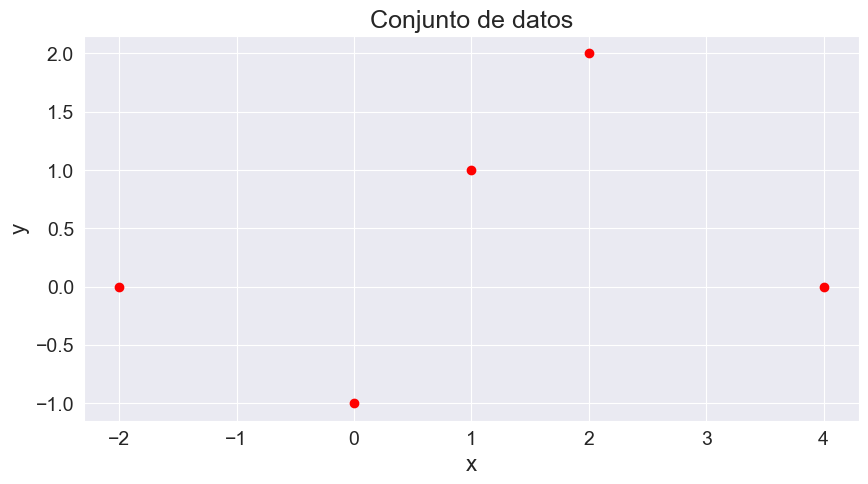

In [17]:
# Datos de la tabla
x = [-2, 0, 1, 2, 4]
y = [-0, -1, 1, 2, 0]

# Graficar los puntos
fig, ax = plt.subplots(figsize=(10, 5))

plt.scatter(x, y, label='datos', color='red')
ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'Conjunto de datos', fontsize=18)
plt.show()


Para encontrar el polinomio base de Lagrange $l_0(x)$, se necesita determinar un polinomio que pase por $(x_0, y_0)$ y que se anule en $x_1, x_2, ..., x_n,$. El valor de $j$ es 0, por lo que el polinomio base de Lagrange $l_0(x)$ se puede construir como:

$$l_0(x) = \frac{(x - x_1)(x - x_2)(x - x_3)(x - x_4)}{(x_0 - x_1)(x_0 - x_2)(x_0 - x_3)(x_0 - x_4)}$$

En este caso, $x_0 = -2$, $x_1 = 0$, $x_2 = 1$, $x_3 = 2$ y $x_4 = 4$. Por lo tanto, $l_0(x)$ se puede escribir como:

$$l_0(x) = \frac{(x - 0)(x - 1)(x - 2)(x - 4)}{(-2 - 0)(-2 - 1)(-2 - 2)(-2 - 4)}$$

Simplificando esta expresión, se llega a:

$$l_0(x) = \frac{(x - 0)(x - 1)(x - 2)(x - 4)}{-112}$$

Para construir el segundo polinomio base de Lagrange $l_1(x)$, necesitamos un polinomio que pase por el punto $(x_1, y_1)$ y que se anule en los demás puntos de la lista. Es decir, $l_1(x_0) = l_1(x_2) = l_1(x_3) = l_1(x_4) = 0$ y $l_1(x_1) = 1$. Reemplazando los valores de los puntos que se nos dieron, obtenemos:

$$ l_1(x) = \frac{(x + 2)(x - 1)(x - 2)(x - 4)}{(0 + 2)(0 - 1)(0 - 2)(0 - 4)} $$

Simplificando esta expresión, obtenemos:

$$ l_1(x) = -\frac{(x + 2)(x - 1)(x - 2)(x - 4)}{16} $$

Este polinomio se anula en $x_0 = -2$, $x_2 = 1$, $x_3 = 2$ y $x_4 = 4$, y toma el valor de 1 en $x_1 = 0$.

Para encontrar el polinomio base de Lagrange $l_2(x)$, se utiliza la misma estrategia que en el caso anterior. Se busca un polinomio que pase por el punto $(x_2, y_2) = (1,1)$ y se anule en $x_0 = -2$, $x_1 = 0$, $x_3 = 2$ y $x_4 = 4$. Sustituyendo los valores correspondientes, se tiene:

$$l_2(x) = \frac{(x+2)(x)(x-2)(x-4)}{(1+2)(1)(1-2)(1-4)} = \frac{(x+2)(x)(x-2)(x-4)}{9}$$

Para obtener $l_3(x)$, necesitamos un polinomio que pase por $(2,2)$ y que se anule en los demás puntos. Sustituyendo los valores específicos para este ejemplo, tenemos:

$$l_3(x) = -\frac{(x + 2)(x)(x - 1)(x - 4)}{16}$$

Para obtener $l_4(x)$, buscamos un polinomio que pase por el punto $(4,0)$ y que se anule en los otros puntos. Utilizando la fórmula del polinomio base de Lagrange, tenemos:

$$l_4(x) = \frac{(x+2)(x)(x-1)(x-2)}{(-2+4)(0+4)(1+4)(2+4)} = \frac{(x+2)x(x-1)(x-2)}{192}$$

Por lo tanto, el polinomio de interpolación de Lagrange es:

$$ p(x) = 0\cdot l_0(x) + (- 1)\cdot l_1(x) + 1\cdot l_2(x) + 2\cdot l_3(x) + 0\cdot l_4(x)$$

Sustituyendo las expresiones de los polinomios base, se tiene:

$$p(x) = \frac{(x + 2)(x - 1)(x - 2)(x - 4)}{16} + \frac{(x+2)(x)(x-2)(x-4)}{9} + 2 \left(-\frac{(x + 2)(x)(x - 1)(x - 4)}{16}\right)  $$

Simplificando y ordenando términos, se obtiene un polinomio de grado 4:

$$ p(x) = \frac{1}{144} \left(7 x^4-55 x^3+44 x^2+292 x-144\right) $$

Este polinomio de grado 4 pasa por los puntos dados y se ajusta a la curva de forma suave. La interpolación de Lagrange es un método útil para aproximar una función desconocida a partir de un conjunto de puntos conocidos. Sin embargo, se debe tener cuidado al utilizar este método en datos grandes, ya que el grado del polinomio puede aumentar considerablemente y generar una gran cantidad de errores de redondeo.

A continuación podemos ver la gráfica del polinomio junto al conjunto de datos para verificar que el polinomio de Lagrange pasa por los puntos dados.

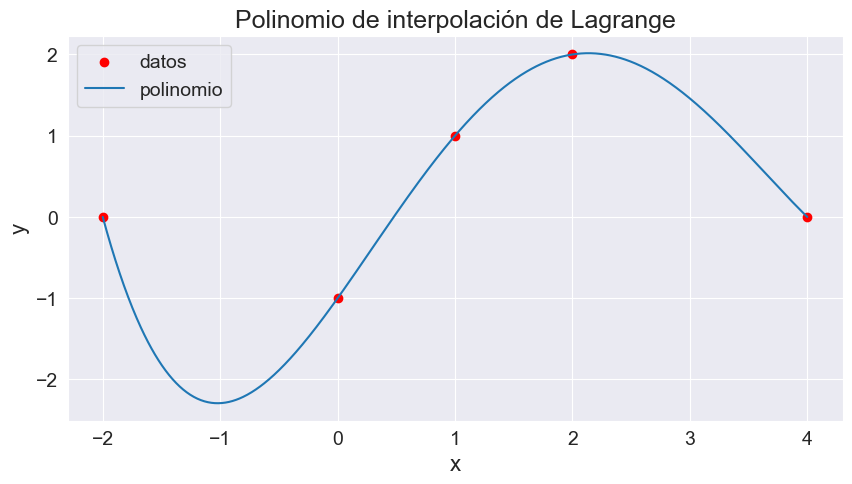

In [18]:
# Datos de la tabla
x = [-2, 0, 1, 2, 4]
y = [-0, -1, 1, 2, 0]
p_lagrange = lambda x: (1/144)*(7*x**4 - 55*x**3 + 44*x**2 + 292*x - 144)
# Graficar los puntos
fig, ax = plt.subplots(figsize=(10, 5))
x0 =np.linspace(min(x), max(x), 1000)
plt.scatter(x, y, label='datos', color='red')
plt.plot(x0, p_lagrange(x0), label='polinomio')
ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'Polinomio de interpolación de Lagrange', fontsize=18)
plt.legend(fontsize=14)
plt.show()

Al inicio de este capítulo se definió la función `LagrangePol`, la cual nos muestra el proceso de encontrar el polinomio de interpolación de Lagrange juto con su gráfica:

Expresión expandida de los polinomios base de lagrange:
x*(x - 4)*(x - 2)*(x + 2)/9 - x*(x - 4)*(x - 1)*(x + 2)/8 + (x - 4)*(x - 2)*(x - 1)*(x + 2)/16
Polinomio de interpolación de Lagrange:
7*x**4/144 - 55*x**3/144 + 11*x**2/36 + 73*x/36 - 1


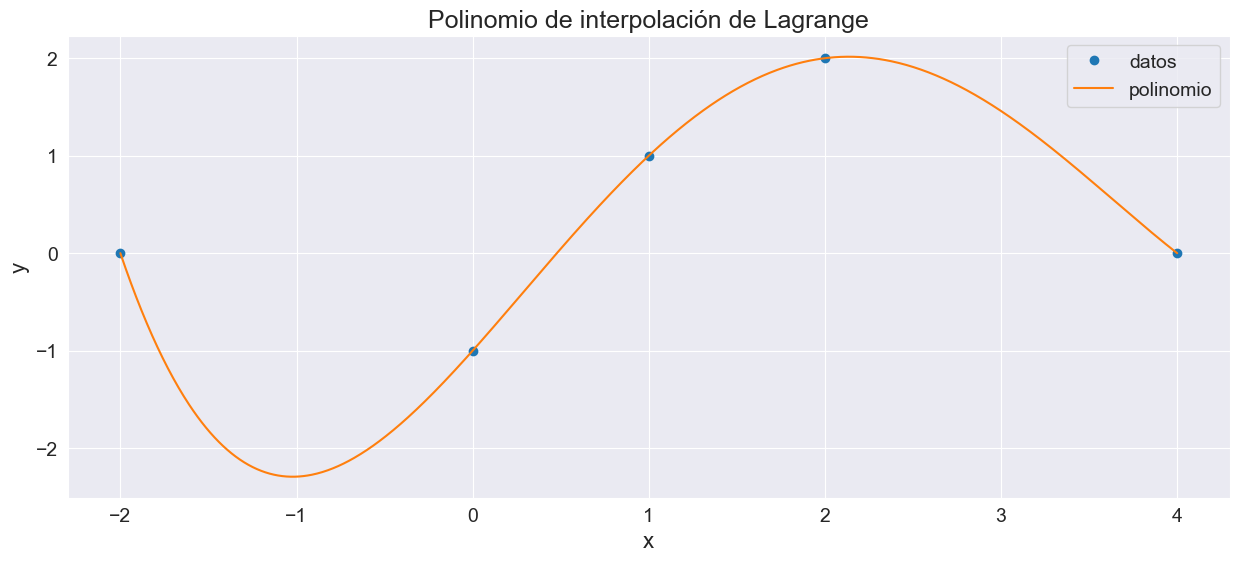

In [19]:
x = [-2, 0, 1, 2, 4]
y = [-0, -1, 1, 2, 0]
Pf = LagrangePol(x, y)

## Ejemplo práctico 2
- Use los *nodos* $x_0 = 2$, $x_1 = 2.5$, $x_2 = 3$ y $x_3 = 4$ para encotrar el polinomio de interpolación de Lagrange cúbico para la función $f(x) = \dfrac{1}{x}$.
- Use el polinomio para aproximar $f(3.5)$

### Solución:
 Dados los nodos $x_0 = 2$, $x_1 = 2.5$, $x_2 = 3$ y $x_3 = 4$ encontramos los correspondientes valores de $y_n$ evaluando cada nodo en $f$:

 $(x_0, y_0) = \left(2, \frac{1}{2}\right)$, $(x_1, y_1) = \left(2.5, \frac{1}{2.5}\right)$, $(x_2, y_2) = \left(3, \frac{1}{4}\right)$ y $(x_3, y_3) = \left(4, \dfrac{1}{4}\right)$
 Ahora aplicamos el algorimo


Expresión expandida de los polinomios base de lagrange:
-0.5*(x - 4)*(x - 3)*(x - 2.5) + 1.06666666666667*(x - 4)*(x - 3)*(x - 2) - 0.666666666666667*(x - 4)*(x - 2.5)*(x - 2) + 0.0833333333333333*(x - 3)*(x - 2.5)*(x - 2)
Polinomio de interpolación de Lagrange:
-0.0166666666666667*x**3 + 0.191666666666666*x**2 - 0.80833333333333*x + 1.48333333333333


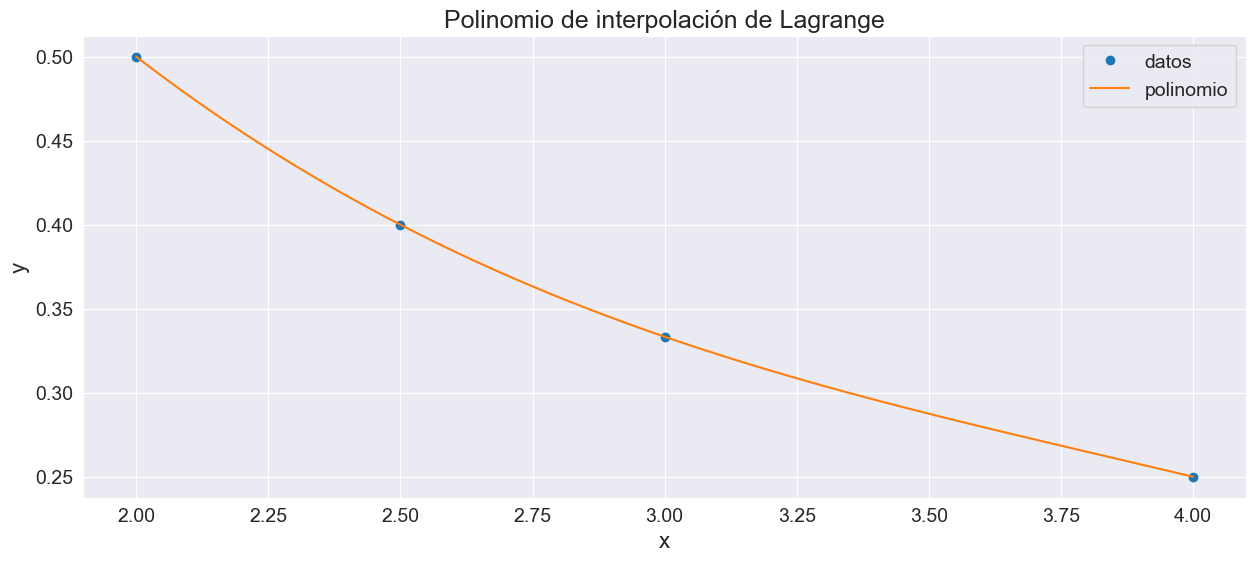

In [20]:
x = [2, 2.5, 3, 4]
y = [1/2, 1/2.5, 1/3, 1/4]
Pf = LagrangePol(x, y)

Si graficamos el polinomio encontrado $p(x) = -0.0166667 x^3 + 0.1916667 x^2 - 0.8083333 x + 1.4833333 $junto con la función $f(x) = \dfrac{1}{x}$ podemos observar que sobre el intervalo $[2, 4]$ ambas funciones concuerdan, es decir que sobre dicho intervalo se encontrara una buena aproximación de la función original, utilizando el polinomio cúbico.

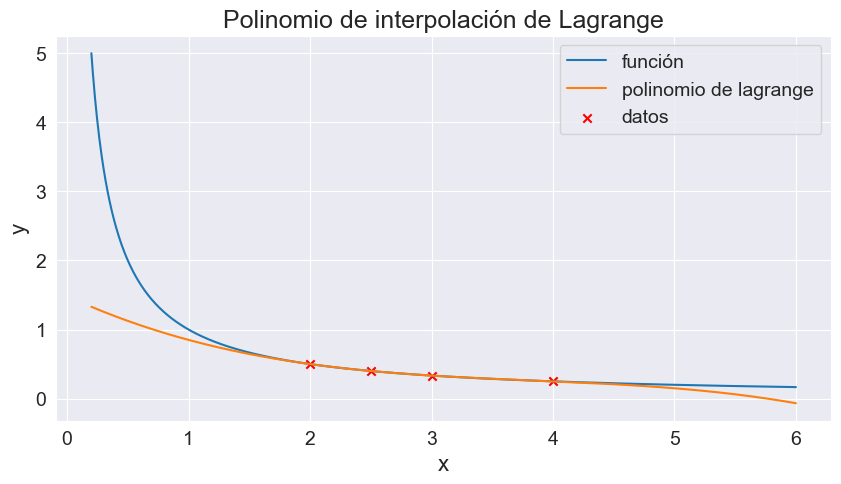

In [21]:
p_lagrange = lambda x: -0.0166666666666667*x**3 + 0.191666666666666*x**2 - 0.80833333333333*x + 1.48333333333333
f = lambda x: 1/x
# Graficar los puntos
fig, ax = plt.subplots(figsize=(10, 5))
x0 =np.linspace(0.2, 6, 1000)

plt.plot(x0, f(x0), label='función')
plt.plot(x0, p_lagrange(x0), label='polinomio de lagrange')
plt.scatter(x, y, label='datos', color='red', marker='x')

ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'Polinomio de interpolación de Lagrange', fontsize=18)
plt.legend(fontsize=14)
plt.show()

Al evaluar $p(3.5) \approx 0.2875$ y compararlo con el valor real $f(3.5) = 1/3.5 \approx 0.2857143$ podemos observar que el error es de $error_{abs} = |p(3.5) - f(3.5| \approx
0.0017857$. Esto nos indica que el polinomio de interpolación es una herramienta útil para obtener datos desconocidos en el intervalo de interpolación con una buena precisión.

In [22]:
print(f'x = 3.5 evaluado de el polnomio de interpolación: p(3.5) = {p_lagrange(3.5)},\n'
      f'x = 3.5 evaluado en la función original: f(3.5) = {f(3.5)}')
print(f' error absoluto: {abs(p_lagrange(3.5) - f(3.5))}')


x = 3.5 evaluado de el polnomio de interpolación: p(3.5) = 0.287499999999999,
x = 3.5 evaluado en la función original: f(3.5) = 0.2857142857142857
 error absoluto: 0.0017857142857132802


## Limitaciones

Como se mencionó en la introducción, el polinomio de interpolación de Lagrange es una herramienta útil para aproximar una función desconocida a partir de un conjunto finito de puntos conocidos. Sin embargo, también tiene algunas limitaciones importantes:

1. Sensibilidad a los nodos de interpolación: el polinomio de interpolación de Lagrange puede ser muy sensible a la elección de los puntos de interpolación. Si los puntos están muy juntos, el polinomio puede oscilar mucho entre ellos, lo que puede generar una mala aproximación de la función. Si los puntos están muy dispersos, el polinomio puede tener una gran pendiente entre ellos, lo que también puede generar una mala aproximación.
2. Costo computacional: el proceso de calcular los coeficientes del polinomio de interpolación de Lagrange puede ser computacionalmente costoso, especialmente cuando se tienen muchos puntos de interpolación. Además, una vez que se ha calculado el polinomio, evaluarlo para un gran número de puntos puede ser lento.
3. Problemas de precisión: en algunos casos, la precisión del polinomio de interpolación de Lagrange puede ser insuficiente para ciertas aplicaciones. Esto puede ser especialmente cierto en casos donde la función a aproximar tiene singularidades o comportamientos complicados.
4. Cualquier adición o eliminación de un punto de datos requiere recalcular todo el polinomio. Es decir, si se agrega o elimina un punto de datos, es necesario realizar todo el proceso de calcular los polinomios de Lagrange nuevamente. Esto puede ser un problema en situaciones en las que los datos cambian con frecuencia o en conjunto de datos muy grandes, ya que el proceso de cálculo puede ser costoso en términos de tiempo y recursos computacionales. Por lo tanto, es importante considerar esta limitación al decidir si el polinomio de interpolación de Lagrange es la mejor opción para un conjunto de datos en particular.

## Ejemplo 3

Hallar el polinomio de interpolación de Lagrange que ajusta los datos $((2, -2.), (2.5, -0.58), (3, 0.57), (3.5, 1.3), (4, 2.1), (5,
2.49), (6, 1.98), (7, 0.47))$.
Graficar los datos junto con el polinomio obtenido.
Analizar el polinomio encontrado: ¿qué conclusiones podemos sacar?

### Solución:
Ahora aplicamos el algoritmo


Expresión expandida de los polinomios base de lagrange:
0.0222222222222222*(x - 7)*(x - 6)*(x - 5)*(x - 4)*(x - 3.5)*(x - 3)*(x - 2.5) - 0.0392804232804233*(x - 7)*(x - 6)*(x - 5)*(x - 4)*(x - 3.5)*(x - 3)*(x - 2) - 0.095*(x - 7)*(x - 6)*(x - 5)*(x - 4)*(x - 3.5)*(x - 2.5)*(x - 2) + 0.264126984126984*(x - 7)*(x - 6)*(x - 5)*(x - 4)*(x - 3)*(x - 2.5)*(x - 2) - 0.233333333333333*(x - 7)*(x - 6)*(x - 5)*(x - 3.5)*(x - 3)*(x - 2.5)*(x - 2) + 0.0553333333333333*(x - 7)*(x - 6)*(x - 4)*(x - 3.5)*(x - 3)*(x - 2.5)*(x - 2) - 0.00942857142857143*(x - 7)*(x - 5)*(x - 4)*(x - 3.5)*(x - 3)*(x - 2.5)*(x - 2) + 0.000248677248677249*(x - 6)*(x - 5)*(x - 4)*(x - 3.5)*(x - 3)*(x - 2.5)*(x - 2)
Polinomio de interpolación de Lagrange:
-0.0351111111111111*x**7 + 1.03285714285714*x**6 - 12.6545873015873*x**5 + 83.620357142857*x**4 - 321.587587301587*x**3 + 718.905357142856*x**2 - 861.554142857142*x + 423.599999999999


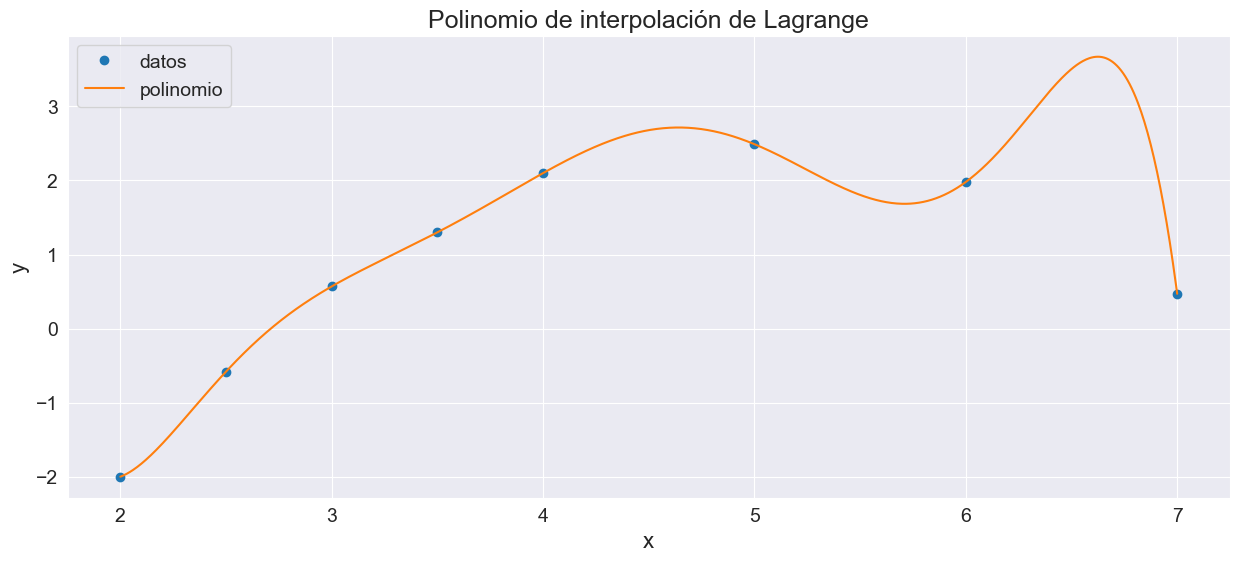

In [23]:
x = [2, 2.5, 3, 3.5, 4, 5, 6, 7]
y = [-2, -0.58, 0.57, 1.3, 2.1, 2.49, 1.98, 0.47]
Pl = LagrangePol(x, y)

En este caso, el polinomio de interpolación de Lagrange no es la mejor opción para ajustar los datos debido a que se presentan grandes oscilaciones, en espacial en los últimos nodos. Esta oscilación puede ser causada por el fenómeno de Runge, que es común en interpolaciones con polinomios de grado alto en intervalos grandes. Además, el polinomio de interpolación de Lagrange puede sufrir de errores de cancelación numérica y de problemas de estabilidad numérica, especialmente cuando se trabaja con datos que están muy cerca uno del otro o que están muy lejos del intervalo de interpolación.

## Librerías de Python
n Python, se puede utilizar la librería `scipy` para encontrar el polinomio de interpolación utilizando el método `scipy.interpolate.lagrange`. Este método toma como entrada dos arreglos NumPy, uno para los valores de $x$ y otro para los valores de $y$, y devuelve el polinomio de interpolación de Lagrange. Es importante tener en cuenta que este método puede ser computacionalmente costoso para grandes conjuntos de datos, por lo que se recomienda su uso con precaución en esas situaciones. A continuación se muestra un ejemplo de cómo utilizar el método `scipy.interpolate.lagrange` para encontrar el polinomio de interpolación de Lagrange del ejemplo anterior.


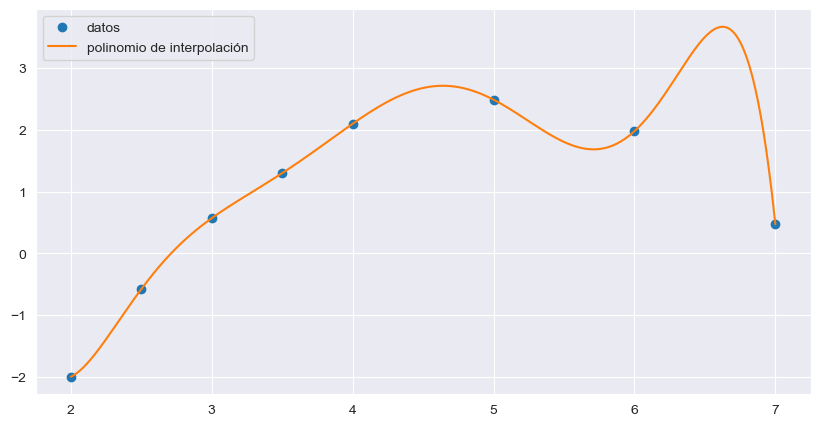

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.array([2, 2.5, 3, 3.5, 4, 5, 6, 7])
y = np.array([-2., -0.58, 0.57, 1.3, 2.1, 2.49, 1.98, 0.47])

# Polinomio de interpolación
from scipy.interpolate import lagrange
polinomio = lagrange(x, y)

# Gráfico de datos y polinomio
fig, ax = plt.subplots(figsize=(10, 5))
x_range = np.linspace(min(x), max(x), 1000)
plt.plot(x, y, 'o', label='datos')
plt.plot(x_range, polinomio(x_range), label='polinomio de interpolación')
plt.legend()
plt.show()

En la línea 10 : `polinomio = lagrange(x, y)` se crea el polinomio de interpolación como un objeto `poly1d`. El cual guarda en una lista los coeficientes de cada grado, del mayor al menor.

In [25]:
polinomio

poly1d([-3.51111111e-02,  1.03285714e+00, -1.26545873e+01,  8.36203571e+01,
       -3.21587587e+02,  7.18905357e+02, -8.61554143e+02,  4.23600000e+02])

A partir de estos datos se puede hallar el polinomio de interpolación:

$p(x) = -0.0351111111 x^7 + 1.03285714 x^6 - 12.6545873 x^5 + 83.6203571 x^4 - 321.587587 x^3 + 718.905357 x^2 - 861.554143 x + 423.6$

## Ejercicios
1. Resuelva la ecuación $\dfrac{\sqrt{x + \sin(x)} + \frac{\pi}{2}}{x} = 1$ con una precisión de $10^{-5}$ utilizando el método de punto fijo. (Sugerencia: pruebe multiplicando por $x$ a ambos lados de la igualdad)
2. Encuentra la solución de la ecuación $\ln(x) + x == 0$ con una presicón de $10^{-6}$, Utilizando cualquier método numérico estudiando. Luego demuestre que la ecuación se puede transformar a la forma de punto fijo como $e^{-x} == x$ y resulevala mediante el método de punto fijo.

### Aplicación
En esta aplicación se va a utilizar la función que modela velocidad de escape de un cohete, es decir, la velocidad mínima que debe tener el cohete para escapar de la atracción gravitatoria de la Tierra. Podemos modelar este problema con la siguiente ecuación:

$$v = V_e \ln\left(\frac{m_0}{m_0 - qt}\right) - gt$$

donde $v$ es la velocidad del cohete, $V_e$ es la velocidad de escape estándar, $m_0$ es la masa inicial del cohete, $q$ es la tasa de consumo de combustible, $t$ es el tiempo y $g$ es la aceleración debido a la gravedad.

Supongamos que tenemos los siguientes valores para los parámetros:

$V_e = 11,200 m/s$,

$m_0 = 2,800,000 kg$,

$q = 13,300 kg/s$,

$g = 9.81 m/s^2$

Queremos determinar cuánto tiempo tarda el cohete en alcanzar la velocidad de escape, es decir, queremos encontrar el valor de t para el cual v es igual a Ve.

Podemos manipular la ecuación anterior en términos de $t$ y obtener una expresión para el método de punto fijo:

$$t_{n+1} = \frac{t_n}{ \ln\left(\frac{m_0}{m_0 - qt_n}\right) - \frac{g t_n}{V_e}$$

donde $t_{n+1}$ es la $n+1$-ésima aproximación para el valor de $t$, y $t_n$ es la $n$-ésima aproximación. De esta manera, la función del punto fijo es:

$$h(t) =  \frac{t}{ \ln\left(\frac{m_0}{m_0 - q t}\right) - \frac{g t}{V_e}$$

Determine un valor inicial para $t$ y demuestre que con los parámetros dados el cohete tarda aproximadamente 2 minutos y 22 segundos en alcanzar la velocidad de escape